# Session 4: One Dimensional Steady-state Conduction

## Session 3 Recap

Derivation of the general heat conduction equation and simplication to the Laplace equation 

## One dimensional, steady-state

- One dimensional: heat transfer occurs only along a single coordinate axis 
- Steady-state: temperature at each point does not vary with time 

Remember, steady-state conditions with no internal energy source or sink means using the Laplace equation: 

$$\frac{d^2 T}{dx^2} =\ 0 $$

Solving by integration:

$$T(x)\ =\ C_1 x\ +\ C_2 $$

Use the following boundary conditions:

$$T(x=0)\ =\ T_1,\ T(x=L)\ =\ T_2$$

$$C_2\ =\ T_1 $$

$$C_1\ =\ \frac{T_2 - T_1}{L} $$

Therefore:

$$T(x)\ =\ (T_2\ -\ T_1)*x/L\ +\ T_1 $$

# Two Dimensional Steady State

$$d^2 T/dx^2\ +\ d^2 T/dy^2\ =\ 0 $$

How do we solve anything over 1D (i.e. any real system?)

1. simple boundary value problem
look for solutions of the form $$e^{\lambda x}$$
bcs differential is always the same exponential times some constant

but why is that significant?

only a few functions are equal to their own nth derivatives. this being the case, e^lambda x can be used for any linear combination of exp, sin, cos

makes it easier to solve

$$d^2(e^{\lambda x})/dx^2\ +\ e^{\lambda x}\ =\ 0 $$

$$\lambda ^2* e^{\lambda x}\ +\ e^{\lambda x}\ =\ 0$$ 

$$\lambda^2\ +\ 1\ =\ 0 $$

$$\lambda\ =\ +/- i $$

$$y\ =\ Ae^{ix}\ +\ Be^{-ix} $$

$$y\ =\ C*cos(x)\ +\ D*sin(x) $$

2. say boundary conditions for 1. are: y(0) = 0 and y(pi) = 0

C + 0 = 0
-C + 0 = 0
therefore C = 0, D = anything

$$y(x)\ =\ D*sin(x) $$

3. $$d^2y/dx^2\ +\ \lambda^2 y\ =\ 0 $$

$$y(0)\ =\ 0,\ y(L)\ =\ 0 $$

general solution, from 1. and 2., is $$y(x)\ =\ A*sin(\lambda x)\ +\ B*cos(\lambda x) $$

boundary conditions: B + 0 = 0 so B = 0

$$A*sin(\lambda L)\ =\ 0 $$

this is satisfied periodically, i.e. $$\lambda _n\ =\ n*pi/L,\ n\ =\ 1,2,3... $$
can think about where sin(x) = 0 in a circle

these are the characteristic values 

4. Sturm-Liouville Problem

$$\frac{d}{dx}[p(x) \frac{dy}{dx}]\ +\ [q(x)\ +\ \lambda w(x)]y\ =\ 0$$

this is a general equation form that has non-trivial solutions

5. 




# Two Dimensional Steady State 

## Separation of Variables

$$T(x,y)\ =\ X(x)Y(y) $$

need to solve by separating variables, where it is assumed a solution exists in the form given above where there is a function of x and a function of y

$$Y*\frac{d^2 X}{dx^2}\ + X*\frac{d^2 Y}{dy^2} $$

$$-\frac{1}{X} \frac{d^2X}{dx^2}\ =\ \frac{1}{Y}*\frac{d^2Y}{dy^2} $$ 

Now the LHS and RHS are each a function of x and y, respectively, and can be solved. Only true if they equal a constant

$$ $$

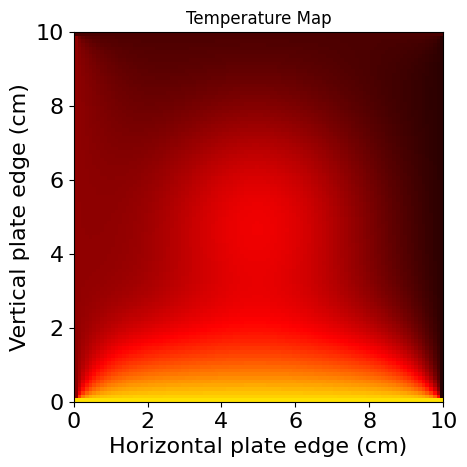

In [2]:
#The following code sample describes the solving a
#partial differential equation numerically.  The equation evaluated in
#this case is the 2D heat equation.  Look at a square copper plate with
#dimensions of 10 cm on a side.  This particular code snippet will actually
#animate the results of the heat transfer and show it as a movie, so one can see how the
#temperature changes in the plate over time.






#STEP 1.  Import the libraries needed to perform the calculations.
#Import the numeric Python and plotting libraries needed to solve the equation.
#Also import the animation library to make a movie of how the temperature map in the
#plate changes over time.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation






#STEP 2.  Set up the position and time grids (or axes).
#Set up the position information.
axis_size = 100                               #Size of the 1D grid.
side_length = 10                              #Length of one side of the square plate (cm)
dx = side_length/axis_size                    #Space step
axis_points = np.linspace(0,10,axis_size)     #Spatial grid points for the plate.

#Set up the time grid to calcuate the equation.
T = 2.0                                       #Total time (s)
k = 1.011                                     #Thermal diffusivity of the plate in units of cm^2/s.
dt = ((1/axis_size)**2)/(2*k)                 #Time step size to ensure a stable discretization scheme.
n = int(T/dt)                                 #Total number of time steps.

#Set maximum initial temperature of the plate (in degrees Celsius)
max_temp = 100






#STEP 3.  Initialization conditions for the 2D heat equation.
#Set up initial temperature in the plate.  The initial temperature will be a Gaussian,
#With the hottest temperature at the middle of the plate and it will be cooler at the edges.

#Function to calculate the initial temperature of the plate.  It will be hottest at the plate center,
#at the maximum initial temperature.
def temp_init(x,y,c,m_temp):
    return m_temp*np.exp(-((x-side_length/2)**2 + (y-side_length/2)**2)/c**2)

#Create a meshgrid for the 3D function of initial temperature.
X, Y = np.meshgrid(axis_points, axis_points)

#denominator in the Gaussian (proportional to standard deviation).
c = 2

#Calculate the initial plate temperature using the temperature initialization function.  This is the initial
#condition of the plate.
U = temp_init(X, Y, c, max_temp)

#Set up some boundary conditions at the edges of the plate for the initial plate condition at t = 0.
#Set plate edge temperatures in degrees Celsius.  The bottom edge is set to be quite hot in this case.
U[:,0] = 20
U[:,-1] = 5
U[0,:] = 10
U[-1,:] = 70

#Assign initial boundary conditions to their own variables.
B1 = U[:,0]
B2 = U[:,-1]
B3 = U[0,:]
B4 = U[-1,:]





#STEP 4.  Laplacian numerical approximation using 5-point stencil finite difference methods.
def laplacian(Z,d_ex):
    Ztop = Z[0:-2,1:-1]
    Zleft = Z[1:-1,0:-2]
    Zbottom = Z[2:,1:-1]
    Zright = Z[1:-1,2:]
    Zcenter = Z[1:-1,1:-1]
    return (Ztop + Zleft + Zbottom + Zright - 4 * Zcenter) / d_ex**2






#STEP 5.  Solve the PDE for a result of all spatial positions after
#time T has elapsed.
#Create an initialized array to store all the temperature map images for each time point.
map_array = np.zeros((axis_size,axis_size,n))

#Numerically solve the PDE by iteration over the specified total time.
for i in range(n):

    #Perform the 3rd order differentiation on the function.
    deltaU = laplacian(U,dx)

    #Take the values of the function inside, but not including
    #the first and last elements.
    Uc = U[1:-1,1:-1]

    #Update the variables after rearranging the differential equation.
    U[1:-1,1:-1] = Uc + dt * (k*deltaU)

    #Direchlet boundary conditions.  The edges of the plate
    #have steady state, constant temperatures over all time.
    U[:,0] = B1
    U[:,-1] = B2
    U[0,:] = B3
    U[-1,:] = B4

    #Update the temperature map array with the current temperature map.
    map_array[:,:,i] = U






#STEP 6.  Animate the temperature maps as a movie to see how the
#temperature in the plate changes over time.  For a movie animation showing the temperature changes,
#we don't need every single temperature map.  The following array picks out a few of the temperature maps
#to make the movie loop, using Numpy slicing.  There are thousands of temperature maps,
#so this takes every 500th map from the original array of temperature maps.
movie_frames = map_array[:,:,0::500]

#Set up the plot template to animate the temperature changes
#across the plate over time.  An initial figure needs to be generated along with the colormap plot
#and the associated labels and axes.
fig = plt.figure()
im = plt.imshow(movie_frames[:,:,0], cmap ='hot', vmin = 0, vmax = max_temp, extent= [0,10,0,10])
plt.xlabel('Horizontal plate edge (cm)', fontsize = 16)
plt.ylabel('Vertical plate edge (cm)', fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('Temperature Map')

#Define the initialization function for the animation.  In this case, the function returns the first frame
#of the movie animation.
def init():
    im.set_array(movie_frames[:,:,0])
    return im

#Define the animation update function.  In this function, each map image will be updated with the current frame.
def animate(i):
    im.set_array(movie_frames[:,:,i])
    return im

#Call the full animation function.  The number of frames is given by the last element of the shape tuple of
#of the movie frames array.  The time interval between each frame is 100 ms, which will show the animated movie
#at 10 fps.
anim = animation.FuncAnimation(fig, animate, init_func = init, frames = movie_frames.shape[2], interval = 100)

#Save the animation as an avi movie file.
anim.save('heatmap_animation.mp4')

#Display the resulting animated heat map, which shows temperature changes in the plate over time as it cools down.
plt.show()






# Problem Set

1. 
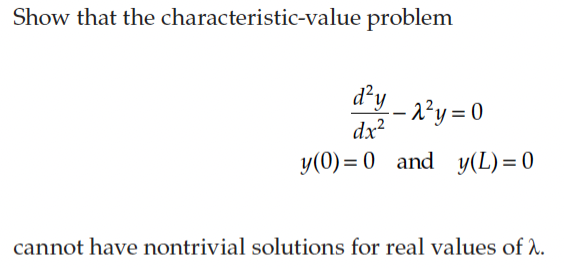

2.
